#                                        **Retail Prices Of Commodities In India**



















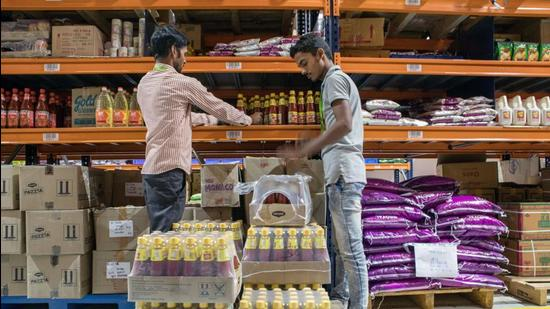

# **Context**
In the light of the recent surge in prices of petrol, prices of several day-to-day commodities have increased (or are expected to increase in the future). Let us take a deep dive into the historical price variation of different commodities in India.

# **Content**
The dataset contains information about retail prices of commodities like fruits, vegetables, clothes, etc. The data captures weekly as well as monthly prices across different states and important/major districts/market centers.

The commodities have generalized categories and do not contain brand information.

# **Data Dictionary**

















*   **State:** Indian state. Example: Maharashtra, Madhya Pradesh, Rajasthan, etc.
*   **Center:** Market center. Example: Mumbai, Pune, Bangalore, etc.
*   **Commodity:** Name of the commodity. Example: Fish, Apple, Dhoti, Saree, Ghee, etc.
*   **Variety:** Subtype of the commodity. Example: Type of apple is Delicious medium size.
*   **Unit:** Measurement unit. Example: Kg, Litre, Dozens, etc.
*   **Category:** Food or Non Food
*   **Date:** For weekly, it is a weekly date and for monthly it is a monthly date.
*   **Retail price:** Retail price of the commodity in rupees.









In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
!pip3 install pandas_profiling --upgrade

In [2]:
# Importing the data and saving it as a dataframe
df = pd.read_csv(r'C:\\Users\\Soumya\\OneDrive\\Desktop\\Main\\Monthly_Food_Retail_Prices.csv')
df

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN
...,...,...,...,...,...,...,...,...
1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN
1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,NaN
1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN
1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.0


# **Understand the** **Data**

In [3]:
# Using Pandas profiling-an open source Python module with which we can quickly do an exploratory data analysis 
#with just a few lines of code.
profile=pp.ProfileReport(df)

In [4]:
profile.to_file("Analysis.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#Finding the count of all uniques values in each column of the dataframe
for i in df.columns:
    print("Column Nam",i,"\n",df[i].value_counts())

Column Nam State 
 Uttar Pradesh        82377
Tamil Nadu           82377
Madhya Pradesh       81891
Rajasthan            69012
Maharashtra          67554
West Bengal          67068
Karnataka            54918
Andhra Pradesh       54675
Gujarat              53946
Assam                52974
Bihar                51516
Union Territories    44469
Kerala               40824
Punjab               40095
Orissa               39366
Uttarakhand          27216
Jammu Kashmir        26487
Haryana              26487
Jharkhand            26001
Himachal Pradesh     24786
Nagaland             13851
Goa                  13851
Sikkim               13851
Telangana            13851
National Capital     13608
Meghalaya            13608
Arunachal Pradesh    13122
Tripura              12879
Mizoram              12636
Manipur              12150
Name: State, dtype: int64
Column Nam Centre 
 Pune          13851
Hyderabad     13851
Salem         13851
Tumkur        13851
Ernakulam     13851
              ...  
Gaya 

In [6]:
#returns a list of all the column names
df.columns.values.tolist() 

['State',
 'Centre',
 'Commodity',
 'Variety',
 'Unit',
 'Category',
 'Date',
 'Retail Price']

In [7]:
#Checking out the dimension of the dataset
df.shape

(1147446, 8)

In [8]:
#Looking at the data type of each column
df.dtypes

State            object
Centre           object
Commodity        object
Variety          object
Unit             object
Category         object
Date             object
Retail Price    float64
dtype: object

In [9]:
# Reading the first five rows of the data
df.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN


In [10]:
#Reading the last five rows of the data
df.tail()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN
1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,NaN
1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN
1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.0
1147445,West Bengal,Malda,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,NaN


In [11]:
# Viewing some basic statistical details like percentile, mean, standard deviation etc. of the data frame 
df.describe()

,Retail Price
count,578525.000000
mean,79.691448
std,148.780859
min,0.500000
25%,18.000000
50%,35.000000
75%,80.000000
max,20045.000000


In [12]:
#Counting number of unique values in the 'State' column 
df["State"].value_counts()

Uttar Pradesh        82377
Tamil Nadu           82377
Madhya Pradesh       81891
Rajasthan            69012
Maharashtra          67554
West Bengal          67068
Karnataka            54918
Andhra Pradesh       54675
Gujarat              53946
Assam                52974
Bihar                51516
Union Territories    44469
Kerala               40824
Punjab               40095
Orissa               39366
Uttarakhand          27216
Jammu Kashmir        26487
Haryana              26487
Jharkhand            26001
Himachal Pradesh     24786
Nagaland             13851
Goa                  13851
Sikkim               13851
Telangana            13851
National Capital     13608
Meghalaya            13608
Arunachal Pradesh    13122
Tripura              12879
Mizoram              12636
Manipur              12150
Name: State, dtype: int64

# **Check Missing values**

In [13]:
#Finding out the count of missing (null) values in each column of the dataframe
df.isnull().sum()

State                0
Centre               0
Commodity         9720
Variety         205578
Unit                 0
Category             0
Date                 0
Retail Price    568921
dtype: int64

# **Fill in Missing** **values**

In [14]:
# Filling in missing values
df["Commodity"].fillna("Not Available",inplace=True)
df["Variety"].fillna("FAQ",inplace = True)

In [15]:
#Rechecing if there are any other missing values 
df.isnull().sum()

State                0
Centre               0
Commodity            0
Variety              0
Unit                 0
Category             0
Date                 0
Retail Price    568921
dtype: int64

# **One Hot Encoding**

**Why Use a One Hot Encoding?**

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [16]:
# pip is a package-management system written in Python used to install and manage software packages.
#It connects to an online repository of public packages, called the Python Package Index.
!pip install --upgrade category_encoders

In [17]:
# Importing category_encoders - A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques.
import category_encoders as ce

In [18]:
#Creating a function for one hot encoding
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [19]:
# Running the function for all the categorical columns in the data
df = one_hot_encoding(df,"State")
df = one_hot_encoding(df,"Centre")
df = one_hot_encoding(df,"Commodity")
df = one_hot_encoding(df,"Variety")
df = one_hot_encoding(df,"Unit")

In [20]:
#Printing the one hot encoded dataframe
df

,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu Kashmir,State_Jharkhand,...,Unit_Dozen,Unit_80gm. Pkt,Unit_Litre,Unit_Kg,Unit_400/800 Gm,Unit_Peice,Unit_500gm. Pkt,Category,Date,Retail Price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,JAN-2001,24.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,JAN-2001,26.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,JAN-2001,25.5
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,JAN-2001,NaN
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,JAN-2001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,MAR-2021,NaN
1147442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,MAR-2021,NaN
1147443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,MAR-2021,NaN
1147444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Food,MAR-2021,20.0


# **Data Transformation**

In [21]:
#Splitting the Date column into two separate columns-one containing the year and another month 
df[["Month","Year"]] = df['Date'].str.split('-',n=1,expand=True)

In [22]:
def split_Date(val):
    mon={'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9,'OCT':10, 'NOV':11, 'DEC':12}
    return mon[val]

In [23]:
df["Month"] = df["Month"].apply(split_Date)

In [24]:
df

,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu Kashmir,State_Jharkhand,...,Unit_Litre,Unit_Kg,Unit_400/800 Gm,Unit_Peice,Unit_500gm. Pkt,Category,Date,Retail Price,Month,Year
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,JAN-2001,24.0,1,2001
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,JAN-2001,26.0,1,2001
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,JAN-2001,25.5,1,2001
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,JAN-2001,NaN,1,2001
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,JAN-2001,NaN,1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,MAR-2021,NaN,3,2021
1147442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,MAR-2021,NaN,3,2021
1147443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,MAR-2021,NaN,3,2021
1147444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Food,MAR-2021,20.0,3,2021


In [25]:
# Since we do not need the Category and Date columns for the prediction, we remove them 
columns_to_be_removed = ["Category","Date"]

In [26]:
df.drop(columns_to_be_removed,axis = 1,inplace= True)

In [27]:
df_test = df[df["Retail Price"].isnull()==True]

In [28]:
df_train = df.dropna()
df_train

,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu Kashmir,State_Jharkhand,...,Unit_Dozen,Unit_80gm. Pkt,Unit_Litre,Unit_Kg,Unit_400/800 Gm,Unit_Peice,Unit_500gm. Pkt,Retail Price,Month,Year
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.0,1,2001
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.0,1,2001
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.5,1,2001
10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28.0,1,2001
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27.0,1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.0,3,2021
1147437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22.0,3,2021
1147438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.0,3,2021
1147439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27.0,3,2021


# **Predicting the Retail Prices**

In [29]:
X_train = df_train.drop("Retail Price",axis = 1)
X_test = df_test.drop("Retail Price",axis = 1)
Y_train = df_train["Retail Price"]

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
Y_pred = lr.predict(X_test)

In [54]:
df_test.loc[:,"Retail Price"] = Y_pred


C:\Users\Soumya\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [34]:
df_test

,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu Kashmir,State_Jharkhand,...,Unit_Dozen,Unit_80gm. Pkt,Unit_Litre,Unit_Kg,Unit_400/800 Gm,Unit_Peice,Unit_500gm. Pkt,Retail Price,Month,Year
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.897461,1,2001
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.430908,1,2001
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15.835938,1,2001
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11.806396,1,2001
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12.063965,1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64.555176,3,2021
1147441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,65.919434,3,2021
1147442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,75.542480,3,2021
1147443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,76.906738,3,2021


In [35]:
df_final = pd.concat([df_train,df_test],axis = 0)

In [36]:
df_final = df_final.reset_index(drop=True)

In [37]:
df_final

,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu Kashmir,State_Jharkhand,...,Unit_Dozen,Unit_80gm. Pkt,Unit_Litre,Unit_Kg,Unit_400/800 Gm,Unit_Peice,Unit_500gm. Pkt,Retail Price,Month,Year
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.000000,1,2001
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.000000,1,2001
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.500000,1,2001
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28.000000,1,2001
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27.000000,1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64.555176,3,2021
1147442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,65.919434,3,2021
1147443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,75.542480,3,2021
1147444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,76.906738,3,2021


In [38]:
X = df_final.drop("Retail Price",axis = 1)
Y = df_final["Retail Price"]

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=27,test_size = 0.25)

# **Training the Model**

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# **Evaluation Metrics**

In [43]:
Y_pred_lr = lr.predict(X_test)

In [44]:
Y_pred_lr

array([138.71008301, -30.69299316,  67.07305908, ..., 101.6427002 ,
       -22.38800049, 122.12890625])

In [45]:
r2_score(Y_pred_lr,Y_test)

0.6333925652375438

In [46]:
Y_pred_ridge = ridge.predict(X_test)

In [47]:
Y_pred_ridge

array([138.82842558, -30.67246043,  67.14468926, ..., 101.81672461,
       -22.41533544, 121.54005056])

In [48]:
r2_score(Y_pred_ridge,Y_test)

0.6334300311846495

In [50]:
df_final.to_csv(r'D:\\Data Science\\Final.csv')